# Claim Prediction

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Insurance Risk and Claims Dataset.csv to Insurance Risk and Claims Dataset.csv


In [ ]:
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

In [ ]:
insurance_risk_claim = pd.read_csv("/content/Insurance Risk and Claims Dataset.csv")

In [ ]:
insurance_risk_claim.isna().sum()

,0
Policy_ID,0
Customer_Age,162
Gender,243
Policy_Type,166
Annual_Income,164
Claim_History,0
Fraudulent_Claim,0
Premium_Amount,0
Claim_Amount,0
Risk_Score,0


In [ ]:
# insurance_risk_claim.drop(['Risk_Score'], axis = 1, inplace = True)

In [ ]:
insurance_risk_claim['Customer_Age'].fillna(insurance_risk_claim['Customer_Age'].median(), inplace = True)
insurance_risk_claim['Annual_Income'].fillna(insurance_risk_claim['Annual_Income'].median(), inplace = True)

In [ ]:
insurance_risk_claim['Gender'].fillna(insurance_risk_claim['Gender'].mode()[0], inplace = True)
insurance_risk_claim['Policy_Type'].fillna(insurance_risk_claim['Policy_Type'].mode()[0], inplace = True)

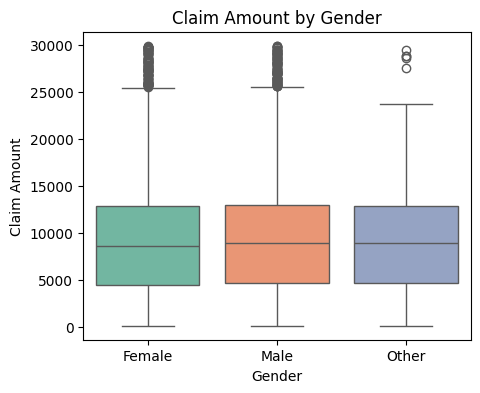

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.boxplot(x='Gender', y='Claim_Amount', data=insurance_risk_claim, palette='Set2')
plt.title('Claim Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

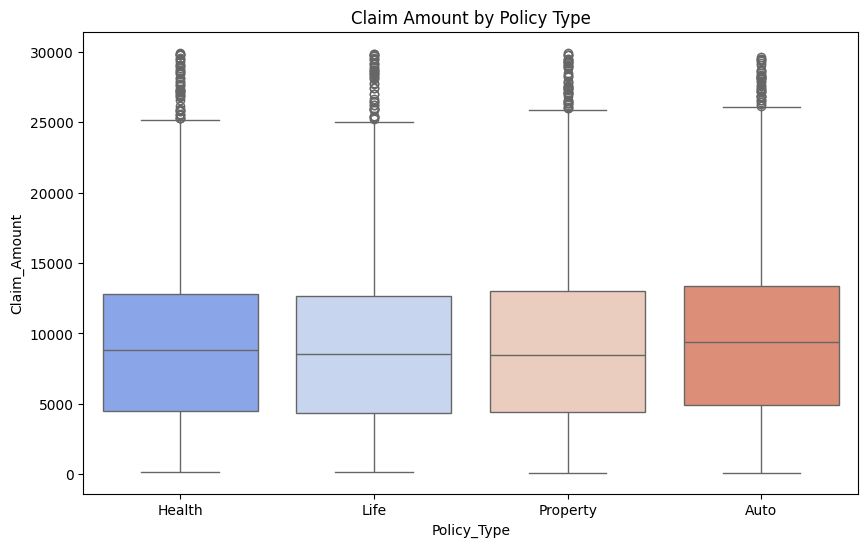

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Policy_Type', y='Claim_Amount', data=insurance_risk_claim, palette='coolwarm')
plt.title('Claim Amount by Policy Type')
plt.show()

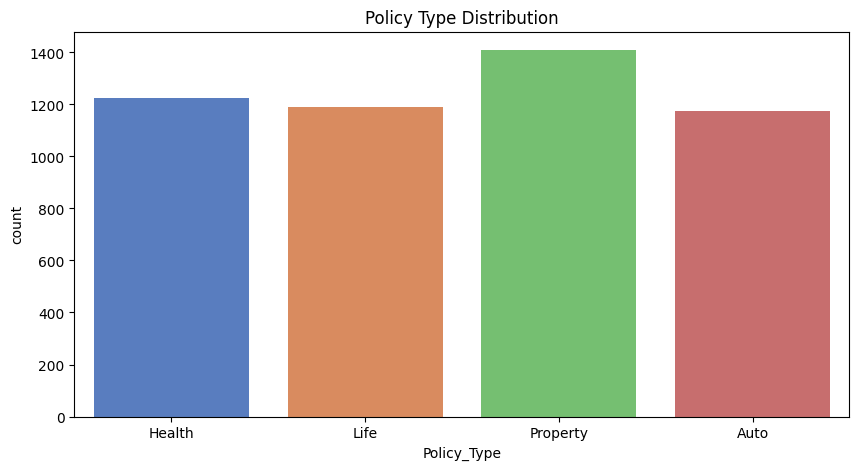

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=insurance_risk_claim, x='Policy_Type', palette='muted')
plt.title('Policy Type Distribution')
plt.show()

In [ ]:
# One-Hot encoding for Gender,Policy type
insurance_risk_claim = pd.get_dummies(insurance_risk_claim, columns = ['Policy_Type', 'Gender','Risk_Score'], dtype = int)
insurance_risk_claim.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,POL000001,56.0,73968.80,1,0,3547.17,14048.25,0,1,0,0,1,0,0,0,1,0
1,POL000002,69.0,128978.03,1,0,2306.97,3901.69,0,1,0,0,0,1,0,0,1,0
2,POL000003,46.0,77282.87,3,0,926.91,1773.26,0,1,0,0,1,0,0,0,0,1
3,POL000004,32.0,65488.60,1,1,5095.42,28134.45,0,0,1,0,1,0,0,1,0,0
4,POL000005,60.0,59238.54,0,1,4688.19,15809.77,0,1,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaled_cols = ["Annual_Income", "Premium_Amount", "Customer_Age"]  # scale input only (not target)
# insurance_risk_claim[scaled_cols] = scaler.fit_transform(insurance_risk_claim[scaled_cols])

insurance_risk_claim[['Annual_Income', 'Premium_Amount', "Customer_Age"]] = scaler.fit_transform(insurance_risk_claim[['Annual_Income', 'Premium_Amount', "Customer_Age"]])


In [ ]:
insurance_risk_claim

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,POL000001,0.348624,0.366407,1,0,0.468867,14048.25,0,1,0,0,1,0,0,0,1,0
1,POL000002,0.467890,0.824817,1,0,0.277913,3901.69,0,1,0,0,0,1,0,0,1,0
2,POL000003,0.256881,0.394024,3,0,0.065424,1773.26,0,1,0,0,1,0,0,0,0,1
3,POL000004,0.128440,0.295738,1,1,0.707252,28134.45,0,0,1,0,1,0,0,1,0,0
4,POL000005,0.385321,0.243655,0,1,0.644551,15809.77,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,POL004996,0.220183,0.056850,1,0,0.680266,12188.03,1,0,0,0,1,0,0,0,1,0
4996,POL004997,0.192661,0.816194,4,0,0.605561,10490.84,1,0,0,0,1,0,0,1,0,0
4997,POL004998,0.880734,0.119884,1,0,0.320144,3165.78,0,0,0,1,1,0,0,0,1,0
4998,POL004999,0.146789,0.588518,0,0,0.483370,1376.22,0,1,0,0,1,0,0,0,1,0


In [ ]:
import pickle

with open("scaler_claims.pkl", "wb") as f:
    pickle.dump(scaler, f)

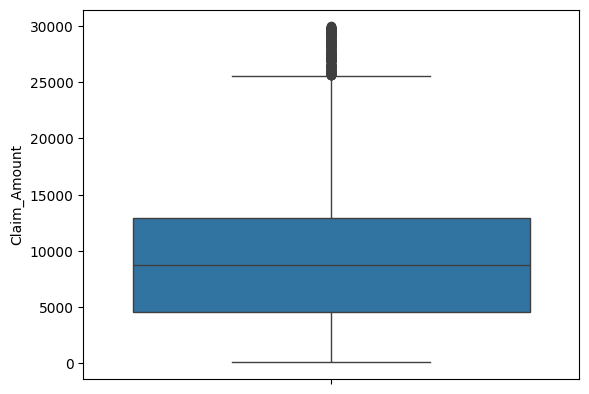

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(insurance_risk_claim['Claim_Amount'])
plt.show()


In [ ]:
# IQR Method

Q1 = insurance_risk_claim['Claim_Amount'].quantile(0.25)
Q3 = insurance_risk_claim['Claim_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


insurance_risk_claim = insurance_risk_claim[(insurance_risk_claim['Claim_Amount'] >= lower_bound) & (insurance_risk_claim['Claim_Amount'] <= upper_bound)]



<Axes: ylabel='Claim_Amount'>

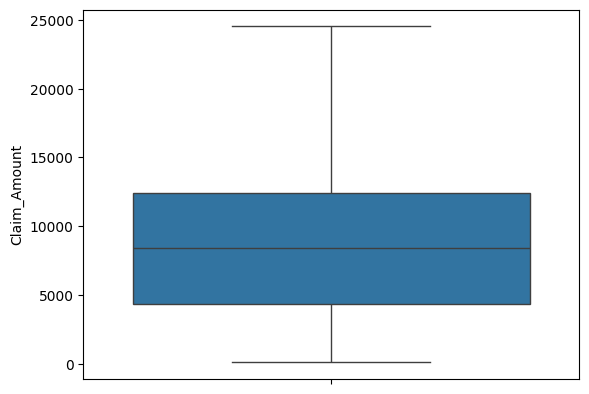

In [ ]:
sns.boxplot(insurance_risk_claim['Claim_Amount'])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
X = insurance_risk_claim.drop(['Policy_ID', 'Fraudulent_Claim', 'Claim_Amount'], axis=1)
y = insurance_risk_claim['Claim_Amount']  # Target (continuous)

In [ ]:
# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np

# Define models with hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 150, 200],
            "max_depth": [3, 5, 7, 10],
            "min_samples_split": [2, 5]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [3, 5, 7, 10, 20],
            "min_samples_split": [2, 3, 5, 7, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [50, 100, 150, 200],
            "learning_rate": [0.005, 0.01, 0.1],
            "max_depth": [3, 5, 7, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [50, 100, 150, 200],
            "learning_rate": [0.005, 0.01, 0.1],
            "max_depth": [3, 5, 7, 10]
        }
    },
    "LightGBM":{
        "model": LGBMRegressor(),
        "params": {
            "n_estimators": [50, 100, 150, 200],
            "learning_rate": [0.005, 0.01, 0.1],
            "max_depth": [3, 5, 7, 10],
            "num_leaves": [10, 20, 30],
            "min_child_samples": [10, 20, 30]
        }
    }
}

# Evaluate models
results = {}
best_model = None
best_rmse = float('inf')

for name, config in models.items():
    print(f"\n=== Training {name} ===")

    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        config["model"],
        config["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Best model from GridSearch
    best_estimator = grid.best_estimator_

    # Predictions
    y_pred = best_estimator.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "model": best_estimator,
        "rmse": rmse,
        "r2": r2,
        "best_params": grid.best_params_
    }

    # Track best model
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = name

    print(f"Best Params: {grid.best_params_}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2_Score: {r2:.4f}")


=== Training Linear Regression ===
Best Params: {}
RMSE: 4489.4007
R2_Score: 0.2799

=== Training Random Forest ===
Best Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150}
RMSE: 4440.8461
R2_Score: 0.2954

=== Training Decision Tree ===
Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
RMSE: 4493.7266
R2_Score: 0.2785

=== Training XGBoost ===
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
RMSE: 4460.1734
R2_Score: 0.2893

=== Training Gradient Boosting ===
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
RMSE: 4457.5832
R2_Score: 0.2901

=== Training LightGBM ===
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 3345, number of used features: 14
[LightGBM] [Info] Start training from score

In [ ]:
print("\n=== Model Performance Summary ===")
for name, res in results.items():
    print(f"\n{name}:")
    print(f"RMSE: {res['rmse']:.4f}")
    print(f"R²: {res['r2']:.4f}")
    print(f"Best Params: {res['best_params']}")

print(f"\nBest Model: {best_model} (RMSE: {best_rmse:.4f})")


=== Model Performance Summary ===

Linear Regression:
RMSE: 4489.4007
R²: 0.2799
Best Params: {}

Random Forest:
RMSE: 4440.8461
R²: 0.2954
Best Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150}

Decision Tree:
RMSE: 4493.7266
R²: 0.2785
Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}

XGBoost:
RMSE: 4460.1734
R²: 0.2893
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Gradient Boosting:
RMSE: 4457.5832
R²: 0.2901
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

LightGBM:
RMSE: 4481.1312
R²: 0.2826
Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 10}

Best Model: Random Forest (RMSE: 4440.8461)


In [ ]:
import pickle

best_model_instance_regressor = results[best_model]['model']

# Save the best model
filename_regressor = 'random_forest_claim_prediction.pkl'
pickle.dump(best_model_instance_regressor, open(filename_regressor, 'wb'))

print(f"Best model saved as {filename_regressor}")


Best model saved as random_forest_claim_prediction.pkl
